In [1]:
from bpp.qubo import Qubo
from bpp.visu import visu_mat
import numpy as np

In [2]:
help(Qubo)

Help on class Qubo in module bpp.qubo:

class Qubo(builtins.object)
 |  Qubo(weights: 'ArrayLike', bin_capacities: 'ArrayLike', lambda_EC: 'None | ArrayLike' = None, lambda_IC: 'None | ArrayLike' = None) -> 'None'
 |  
 |  Methods defined here:
 |  
 |  __init__(self, weights: 'ArrayLike', bin_capacities: 'ArrayLike', lambda_EC: 'None | ArrayLike' = None, lambda_IC: 'None | ArrayLike' = None) -> 'None'
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  check_vadility(self, solution_vec: 'ArrayLike') -> 'bool'
 |      Check if solution vector is valid.
 |      
 |      Parameters
 |      ----------
 |      solution_vec : ArrayLike
 |          Solution vector x_hat.
 |      
 |      Returns
 |      -------
 |      bool
 |  
 |  s2global(self, j: 'int', k: 'int') -> 'int'
 |      Map s-index to global x_hat-index.
 |  
 |  x2global(self, i: 'int', j: 'int') -> 'int'
 |      Map x-index to global x_hat-index.
 |  
 |  y2global(self, j: 'int') -> 'int'
 |      M

In [3]:
qubo = Qubo.from_json()

$$
f^{OF}(y) = \sum_{j=1}^m y_j
$$

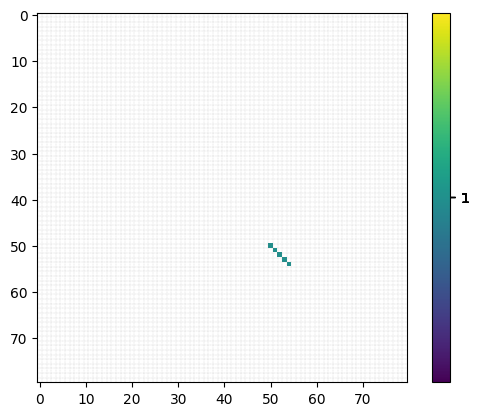

In [4]:
visu_mat(qubo._f_OF())

$$
f^{EC}(x) = \sum_{i=0}^{n_{\text{items}}-1}  \lambda_i^{EC} \left[ \sum_{j=0}^{n_{\text{bins}}-1} (-1) x_{ij} + 2 \sum_{j=0}^{n_{\text{bins}}-1} \sum_{j_2>j}^{n_{\text{bins}}-1} x_{ij} x_{ij_2} \right] 
$$

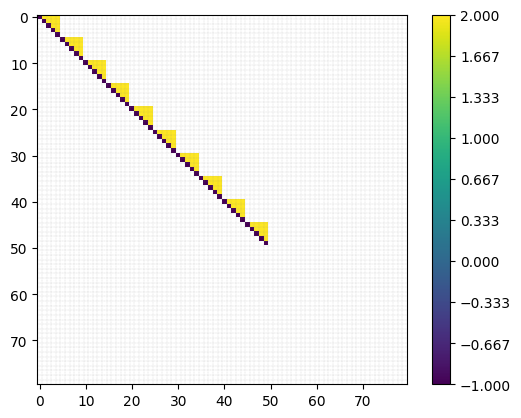

In [5]:
visu_mat(qubo._f_EC())

$$
f_{1}^{IC}(x) = \sum_{j=0}^{n_{\text{bins}}-1} \lambda_j^{IC} \left[ \sum_{i=0}^{n_{\text{items}}-1} w_i^2 x_{ij} +2 \sum_{i=0}^{n_{\text{items}}-1}\sum_{i_2>i}^{n_{\text{items}}-1} w_i w_{i_2} x_{ij} x_{i_2j} \right]
$$

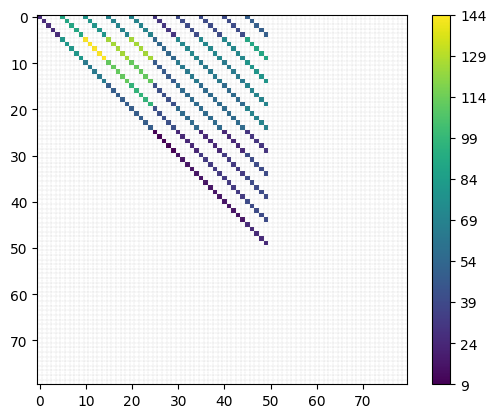

In [6]:
visu_mat(qubo._f1_IC())

$$
f_{2}^{IC}(y) = \sum_{j=0}^{n_{\text{bins}}-1} \lambda_j^{IC} W_j^2 y_j
$$

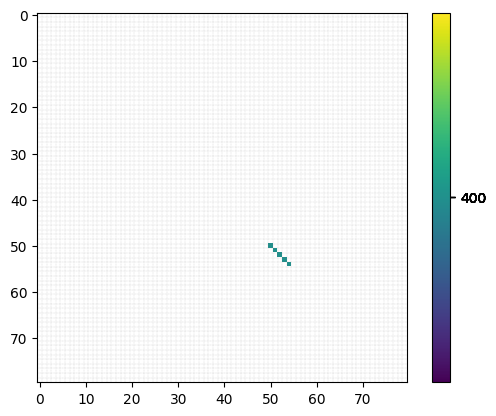

In [7]:
visu_mat(qubo._f2_IC())

$$
f_{3}^{IC}(s) = \sum_{j=0}^{n_{\text{bins}}-1} \lambda_j^{IC}  \left[ \sum_{k=0}^{N_{j}-1} 2^{2k} s_{jk} + 2 \sum_{k=0}^{N_{j}-1} \sum_{k_2> k}^{N_{j}-1} 2^k 2^{k_2} s_{jk} s_{jk_2} \right]
$$

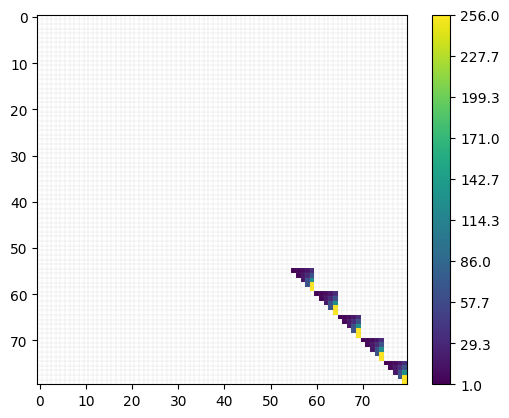

In [8]:
visu_mat(qubo._f3_IC())

$$
f_4^{IC}(x,s) = \sum_{j=0}^{n_{\text{bins}}-1} \lambda_j^{IC} \left[ 2 \left(\sum_{k=0}^{N_{j}-1} 2^k s_{jk}\right) \left( \sum_{i=0}^{n_{\text{items}}-1} w_i x_{ij} \right) \right]
$$

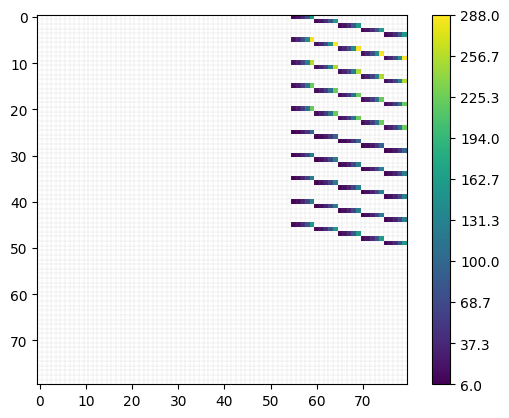

In [9]:
visu_mat(qubo._f4_IC())

$$
f_{5}^{IC}(x,y) = \sum_{j=0}^{n_{\text{bins}}-1}  \lambda_j^{IC} \left[ (-2)  W_j y_j  \left(\sum_{i=0}^{n_{\text{items}}-1}  w_i x_{ij}\right) \right]
$$

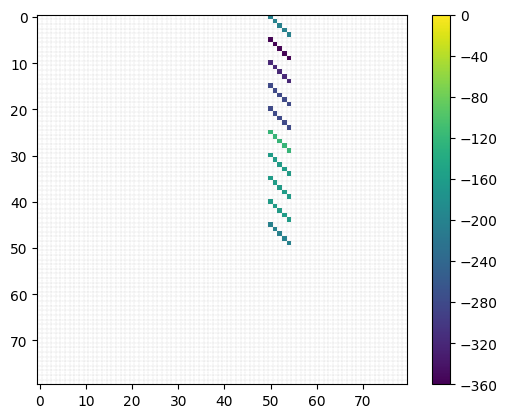

In [10]:
visu_mat(qubo._f5_IC())

$$
f_6^{IC}(y,s) = \sum_{j=0}^{n_{\text{bins}}-1}  \lambda_j^{IC}  \left[ (-2)  W_j y_j  \left( \sum_{k=0}^{N_{j}-1} 2^k s_{jk} \right) \right]
$$

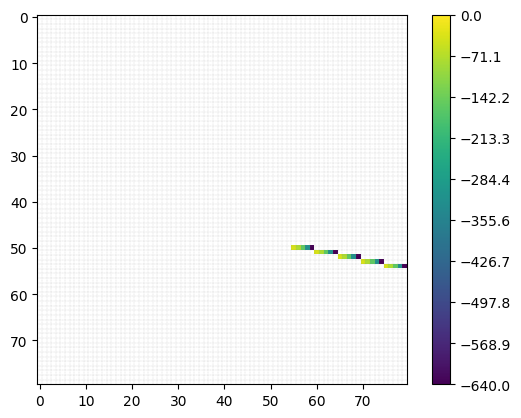

In [11]:
visu_mat(qubo._f6_IC())

$$
\mathrm{Q} = 
   \begin{bmatrix}
   		Q_{xx} & Q_{xy} & Q_{xs} \\
   		\vdots & Q_{yy} & Q_{ys} \\
   		0 & \dots & Q_{ss}
   \end{bmatrix}
$$

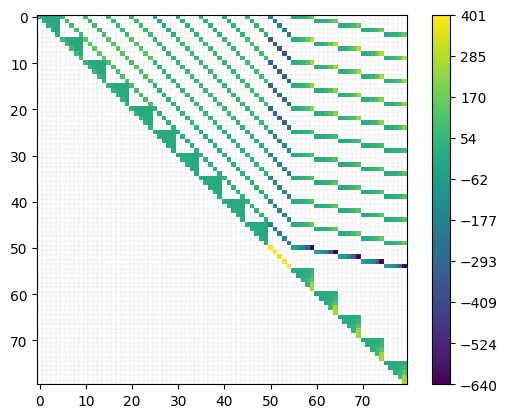

In [12]:
visu_mat(qubo.Q)

$$
Q_{xx} \in \mathbb{R}^{(n_{\text{items}} \cdot n_{\text{bins}}) \times (n_{\text{items}} \cdot n_{\text{bins}})}
$$

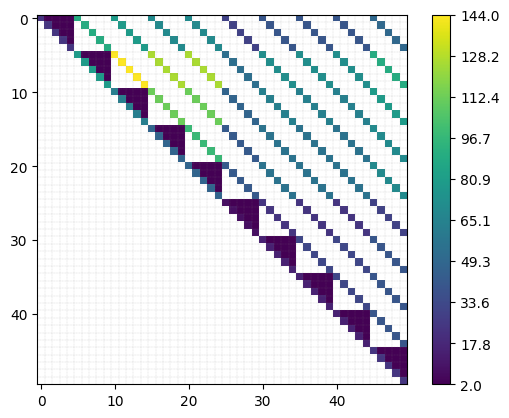

In [13]:
visu_mat(qubo.Qxx)

$$
Q_{xy} \in \mathbb{R}^{(n_{\text{items}} \cdot n_{\text{bins}}) \times n_{\text{bins}}}
$$

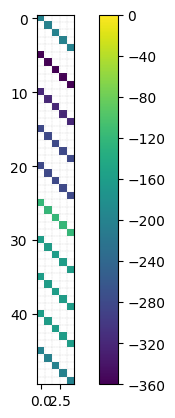

In [14]:
visu_mat(qubo.Qxy)

$$
Q_{xs} \in \mathbb{R}^{(n_{\text{items}} \cdot n_{\text{bins}}) \times (\sum_j N_j)}
$$

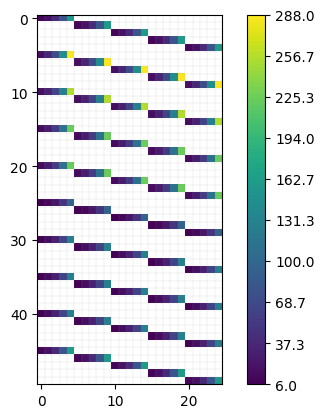

In [15]:
visu_mat(qubo.Qxs)

$$
Q_{yy} \in \mathbb{R}^{n_{\text{bins}} \times n_{\text{bins}}}
$$

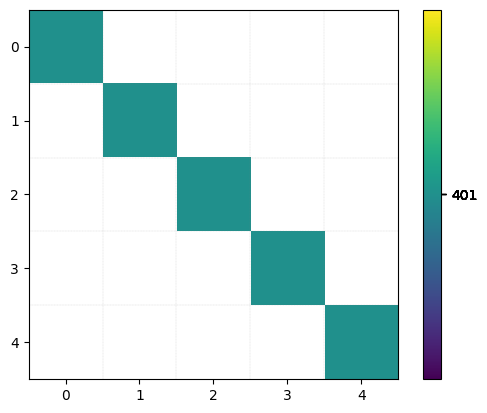

In [16]:
visu_mat(qubo.Qyy)

$$
Q_{ys} \in \mathbb{R}^{n_{\text{bins}} \times (\sum_j N_j)}
$$

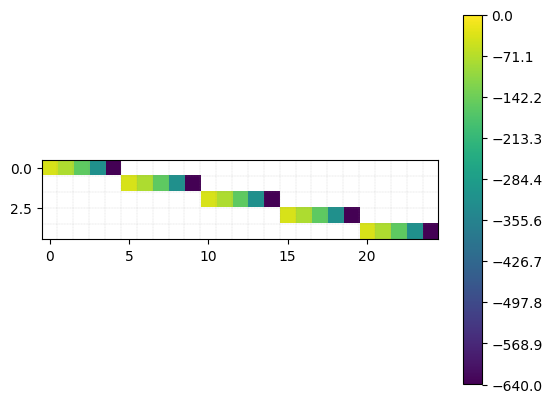

In [17]:
visu_mat(qubo.Qys)

$$
Q_{ss} \in \mathbb{R}^{(\sum_j N_j) \times (\sum_j N_j)}
$$

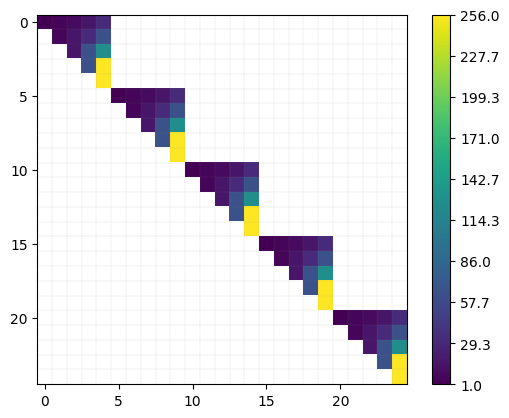

In [18]:
visu_mat(qubo.Qss)